<a href="https://colab.research.google.com/github/VictorSwankyTiger/DM2024-Lab1-Homework/blob/main/DM2024-Lab1-Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Student Information
Name:洪振庭

Student ID:110000223

GitHub ID:

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__.

# 1. Download and setup (Maybe different by enviroment and device)

This part is download the HW dataset from hugging face using kaggle and colab note book, you can download data into your local PC.

In [28]:
!git clone https://huggingface.co/spaces/AP123/IllusionDiffusion

Cloning into 'IllusionDiffusion'...
remote: Enumerating objects: 271, done.
remote: Counting objects: 100% (267/267), done.
remote: Compressing objects: 100% (267/267), done.
remote: Total 271 (delta 164), reused 0 (delta 0), pack-reused 4 (from 1)
Receiving objects: 100% (271/271), 131.72 KiB | 8.23 MiB/s, done.
Resolving deltas: 100% (164/164), done.


In [29]:
%cd IllusionDiffusion

/kaggle/working/IllusionDiffusion/IllusionDiffusion


In [30]:
#!pip install -r requirements.txt -q
!pip install jupyterlab-lsp== 5.0.3
!pip install pipreqs

ERROR: Could not find a version that satisfies the requirement jupyterlab-lsp== (from versions: 3.0.0rc0, 3.0.0, 3.1.0, 3.2.0, 3.3.0, 3.3.1, 3.4.0, 3.4.1, 3.5.0, 3.6.0, 3.7.0, 3.8.0, 3.8.1, 3.9.0, 3.9.1, 3.9.2, 3.9.3, 3.10.0, 3.10.1, 3.10.2, 4.0.0, 4.0.1, 4.1.0, 4.2.0, 4.3.0, 5.0.0a0, 5.0.0b0, 5.0.0b1, 5.0.0rc0, 5.0.0rc1, 5.0.0, 5.0.1, 5.0.2, 5.0.3, 5.1.0)
ERROR: No matching distribution found for jupyterlab-lsp==


In [31]:
!pip install gradio

In [32]:
!pip install spaces

In [33]:
!python app.py

Traceback (most recent call last):
  File "/kaggle/working/IllusionDiffusion/IllusionDiffusion/app.py", line 8, in <module>
    from diffusers import (
ModuleNotFoundError: No module named 'diffusers'


In [34]:
!pip install huggingface_hub

In [35]:
from huggingface_hub import notebook_login

notebook_login()

In [54]:
import pandas as pd


df = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")

In [55]:
df.head(10)


,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
4,nostalgia,listening to his songs reminds me of my mum wh...
5,nostalgia,"Every time I heard this song as a child, I use..."
6,nostalgia,"My dad loved listening to Jim Reeves, when I w..."
7,nostalgia,i HAVE ALSO LISTENED TO Jim Reeves since child...
8,not nostalgia,Wherever you are you always in my heart
9,not nostalgia,Elvis will always be number one no one can com...


# 2. Data preprocessing

In [56]:
#test mark
categories = ['not nostalgia','nostalgia']


In [39]:
# TEST necessary for when working with external scripts
#%load_ext autoreload
#%autoreload 2

In [57]:
print(len(df))
print(df[0:2])
for text in df["comment"][:2]:
    print(text)

1500
       sentiment                                            comment
0  not nostalgia  He was a singer with a golden voice that I lov...
1      nostalgia  The mist beautiful voice ever I listened to hi...
He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.
The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel


In [58]:
import numpy as np
df['nostalgia']=pd.Series(np.arange(df['sentiment'].shape[0]))
for i in range(0,df['sentiment'].shape[0]):
    if(df['sentiment'][i]=='nostalgia'): df.loc[i,'nostalgia'] = 1
    else: df.loc[i,'nostalgia'] = 0

In [59]:
df.head(5)

,sentiment,comment,nostalgia
0,not nostalgia,He was a singer with a golden voice that I lov...,0
1,nostalgia,The mist beautiful voice ever I listened to hi...,1
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,1
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,0
4,nostalgia,listening to his songs reminds me of my mum wh...,1


In [63]:
df.isnull()

,sentiment,comment,nostalgia
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
1495,False,False,False
1496,False,False,False
1497,False,False,False
1498,False,False,False


In [65]:
df.dropna(inplace=True)
df.isnull().apply(lambda x: dmh.check_missing_values(x))
df.drop_duplicates(keep=False, inplace=True)

In [61]:
import sys
sys.path.append('/kaggle/input/helpers')
import data_mining_helpers as dmh


sentiment
nostalgia        750
not nostalgia    748
Name: count, dtype: int64


<Axes: title={'center': 'Distribution'}, xlabel='sentiment'>

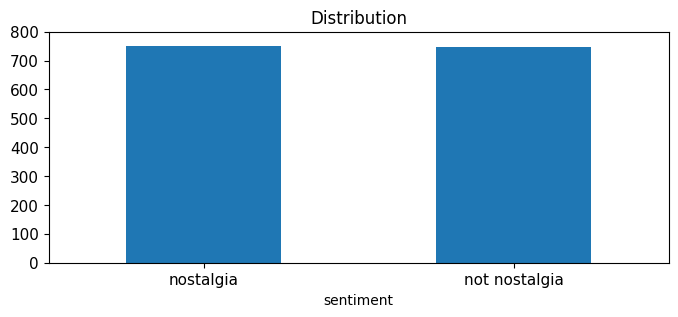

In [67]:
print(df.sentiment.value_counts())

#print out count of distribuition
df.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'Distribution',
                                    ylim = [0, 800],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

In [70]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
counts = count_vect.fit_transform(df.comment)
print(counts[0])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 45 stored elements and shape (1, 3730)>
  Coords	Values
  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  (0, 2328)	2
  (0, 245)	1
  (0, 3581)	1
  (0, 1591)	1
  (0, 2082)	1
  (0, 2974)	1
  (0, 573)	1
  (0, 593)	1
  (0, 3538)	1
  (0, 1347)	2
  (0, 1833)	1
  (0, 2671)	1
  (0, 3713)	2
  (0, 1272)	1
  (0, 2688)	1
  (0, 1125)	1
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1


In [71]:
feature_names = count_vect.get_feature_names_out()

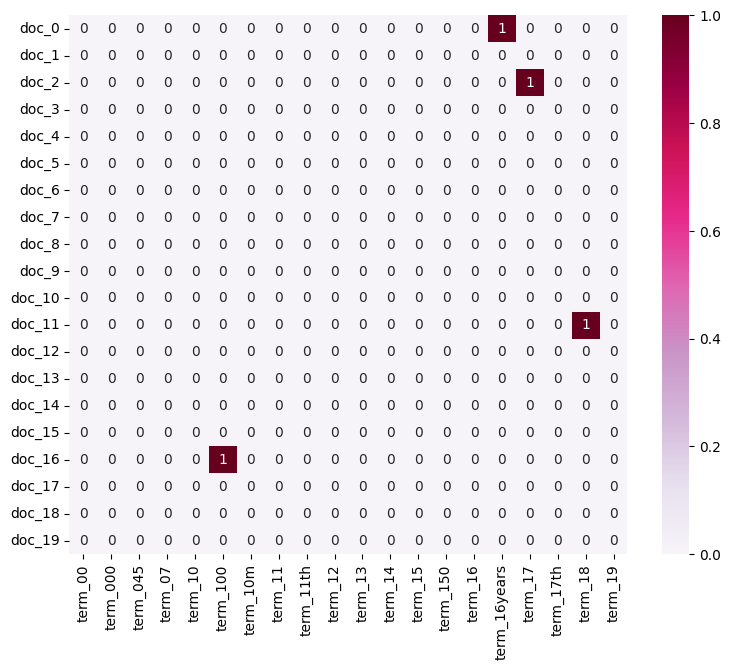

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

#hitmap of document words
plot_x = ["term_"+str(i) for i in feature_names[0:20]]
plot_y = ["doc_"+ str(i) for i in df.index[0:20]]
plot_z = counts[0:20, 0:20].toarray() 
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

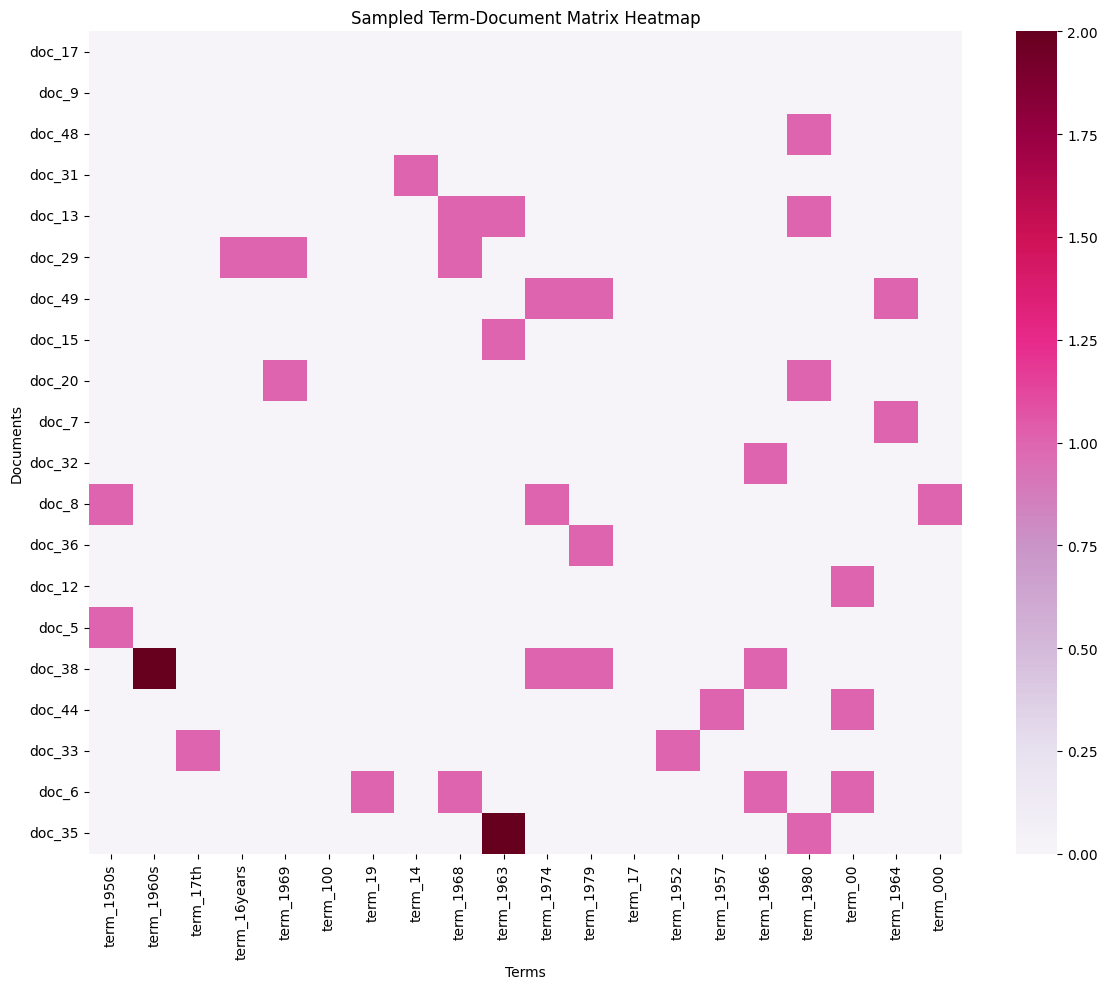

In [87]:
#hitmap
term_document_matrix = np.random.poisson(0.1, (50, 50)) 

df_tdm = pd.DataFrame(term_document_matrix, columns=["term_"+str(i) for i in feature_names[0:50]], index=["doc_"+ str(i) for i in df.index[0:50]])
df_sampled = df_tdm.sample(n=20, axis=0).sample(n=20, axis=1)
plt.figure(figsize=(12, 10))
sns.heatmap(df_sampled, cmap="PuRd", vmin=0, vmax=df_sampled.values.max(), annot=False, cbar=True)
plt.title("Sampled Term-Document Matrix Heatmap")
plt.xlabel("Terms")
plt.ylabel("Documents")
plt.tight_layout()
plt.show()

In [100]:
term_frequencies = []
for j in range(0,counts.shape[1]):
    term_frequencies.append(sum(counts[:,j].toarray()))
term_frequencies = np.asarray(counts.sum(axis=0))[0]


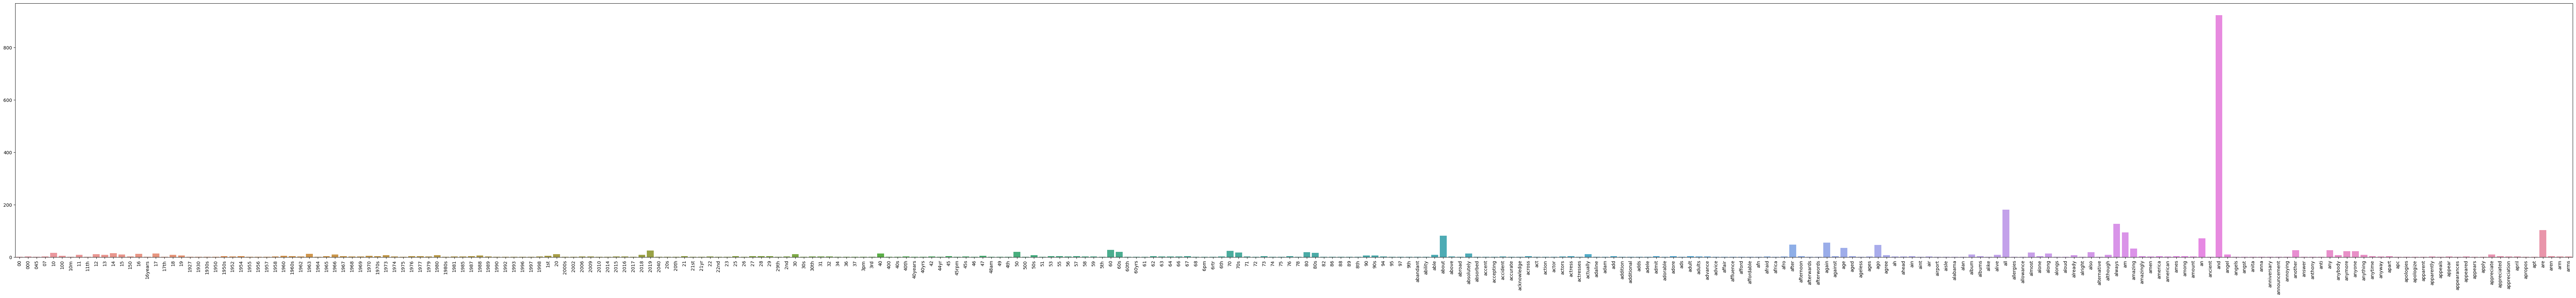

In [101]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [103]:
!pip install plotly
!pip install chart-studio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.5 MB/s eta 0:00:00a 0:00:01


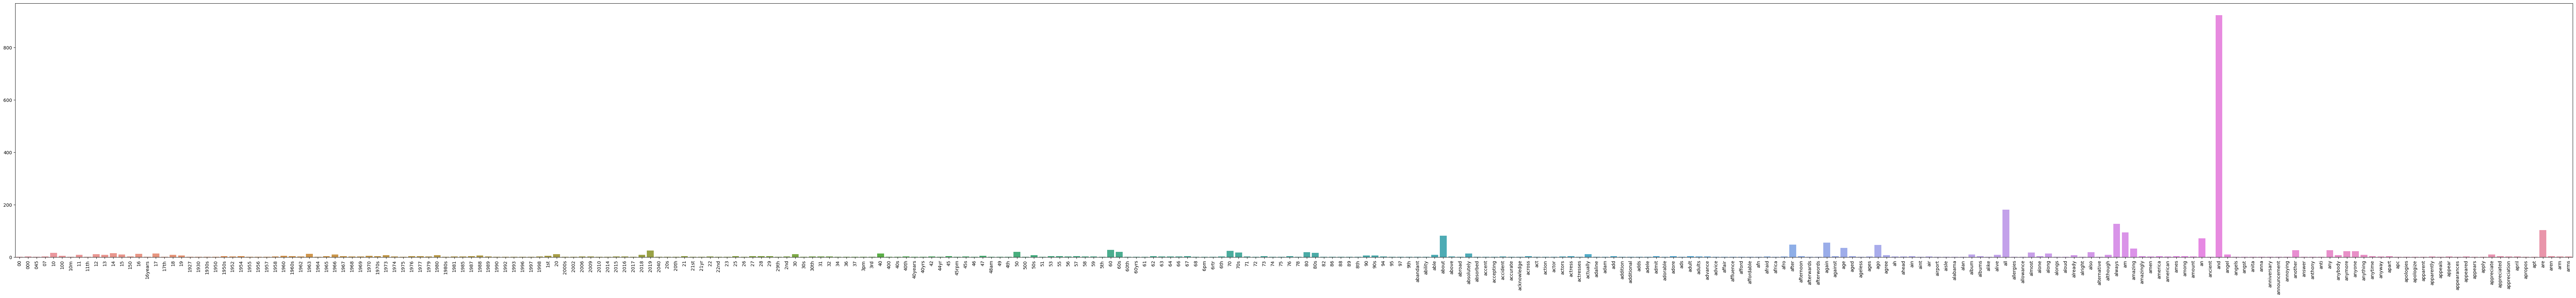

In [104]:
import chart_studio
from chart_studio import plotly
#from plotly import tools
import plotly as py
import plotly.graph_objs as go

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


In [106]:
import plotly.offline as pof
import plotly.graph_objects as go

features = count_vect.get_feature_names_out()[:300]  
term_frequencies = term_frequencies[:300] 

fig = go.Figure(data=[
    go.Bar(x=features, y=term_frequencies)
])

fig.update_layout(
    title="Term Frequency Distribution",
    xaxis_title="Terms",
    yaxis_title="Frequency",
    xaxis_tickangle=-90,  
    height=500,  
    width=1200  
)

# Show the figure
fig.show()

In [108]:
import plotly.express as px

# Assuming X_counts is your term-document matrix
# Compute term frequencies (total count across all documents)
term_frequencies = np.array(counts.sum(axis=0)).flatten()

# Get the vocabulary (term names)
vocab = count_vect.get_feature_names_out()

df_term_frequencies = pd.DataFrame({
    'Term': vocab,
    'Frequency': term_frequencies
})

# Step 1: Sort by frequency and keep only top N terms (e.g., top 100)
top_n = 300  
df_top_n = df_term_frequencies.sample(n=top_n)

# Step 2: Plot the top N terms using Plotly
fig = px.bar(df_top_n, x='Term', y='Frequency')

# Step 3: Customize the plot
fig.update_layout(
    title=f"Random {top_n} Frequent Terms",
    xaxis_tickangle=-90,  # Rotate x-axis labels for readability
    height=500,
    width=1200,
    xaxis_title="Terms",
    yaxis_title="Frequency"
)

# Show the interactive plot
fig.show()

In [110]:
# Compute term frequencies (total count across all documents)
term_frequencies = np.array(counts.sum(axis=0)).flatten()

# Get the vocabulary (term names)
vocab = count_vect.get_feature_names_out()

df_term_frequencies = pd.DataFrame({
    'Term': vocab,
    'Frequency': term_frequencies
})

# Step 1: Sort by frequency and keep only top N terms (e.g., top 100)
top_n = 300  
df_top_n = df_term_frequencies.nlargest(top_n, 'Frequency')

# Step 2: Plot the top N terms using Plotly
fig = px.bar(df_top_n, x='Term', y='Frequency')

# Step 3: Customize the plot
fig.update_layout(
    title=f"Top {top_n} Most Frequent Terms",
    xaxis_tickangle=-90,  # Rotate x-axis labels for readability
    height=500,
    width=1200,
    xaxis_title="Terms",
    yaxis_title="Frequency"
)

# Show the interactive plot
fig.show()

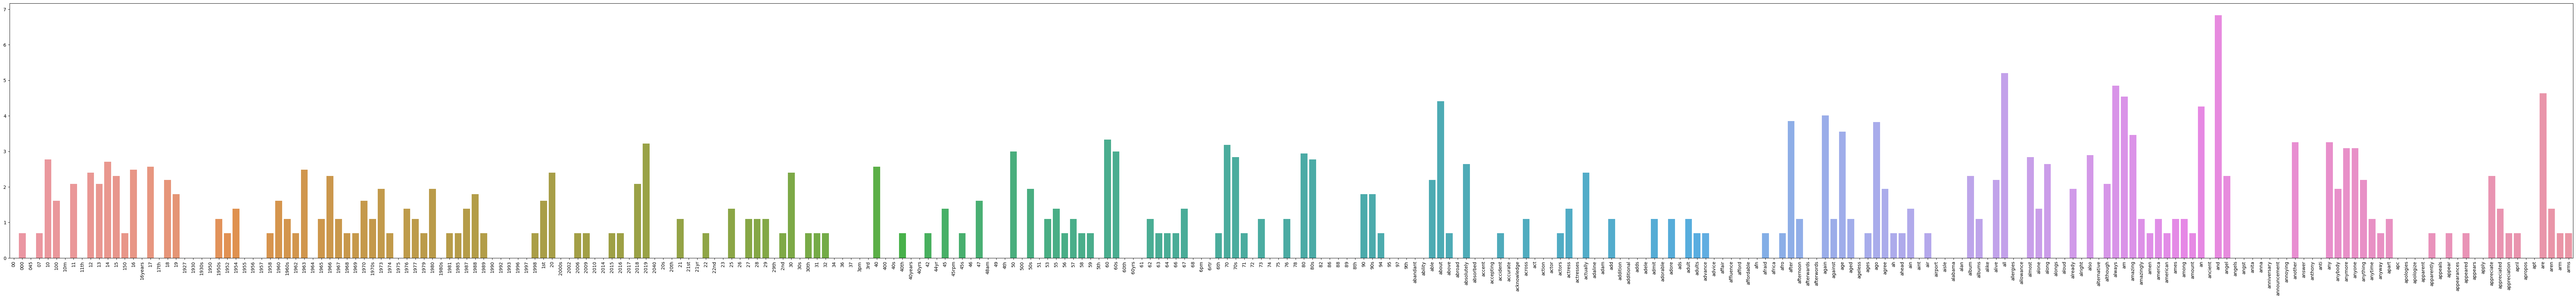

In [111]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [113]:
# Compute term frequencies (total count across all documents)
term_frequencies = np.array(counts.sum(axis=0)).flatten()
term_frequencies_log = [math.log(i) for i in term_frequencies]

# Get the vocabulary (term names)
vocab = count_vect.get_feature_names_out()

df_term_frequencies = pd.DataFrame({
    'Term': vocab,
    'Frequency': term_frequencies_log
})

# Step 1: Sort by frequency and keep only top N terms (e.g., top 100)
top_n = 300  
df_top_n = df_term_frequencies.nlargest(top_n, 'Frequency')

# Step 2: Plot the top N terms using Plotly
fig = px.bar(df_top_n, x='Term', y='Frequency')

# Step 3: Customize the plot
fig.update_layout(
    title=f"Top {top_n} Most Frequent Terms",
    xaxis_tickangle=-90,  # Rotate x-axis labels for readability
    height=500,
    width=1200,
    xaxis_title="Terms",
    yaxis_title="Frequency"
)

# Show the interactive plot
fig.show()


In [115]:
# Assuming X_counts is your term-document matrix
# Compute term frequencies (total count across all documents)
term_frequencies = np.array(counts.sum(axis=0)).flatten()
term_frequencies_log = [math.log(i) for i in term_frequencies]

# Get the vocabulary (term names)
vocab = count_vect.get_feature_names_out()

df_term_frequencies = pd.DataFrame({
    'Term': vocab,
    'Frequency': term_frequencies_log
})

# Step 1: Sort by frequency and keep only top N terms (e.g., top 100)
top_n = 300  
df_top_n = df_term_frequencies.sample(n=top_n)

# Step 2: Plot the top N terms using Plotly
fig = px.bar(df_top_n, x='Term', y='Frequency')

# Step 3: Customize the plot
fig.update_layout(
    title=f" Random {top_n} Frequent Terms",
    xaxis_tickangle=-90,  # Rotate x-axis labels for readability
    height=500,
    width=1200,
    xaxis_title="Terms",
    yaxis_title="Frequency"
)

# Show the interactive plot
fig.show()

In [125]:
#Create separate DataFrames for each category
categories = df['sentiment'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = df[df['sentiment'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['comment'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    term_document_dfs[category] = create_term_document_df(category_dfs[category])


In [126]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number=0 #You can change it from 0 to 3
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category not nostalgia:


,00,000,045,10,100,10m,11,12,14,15,...,youngest,youngsters,your,yourself,youth,youtube,yrs,yuo,zealand,zulus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


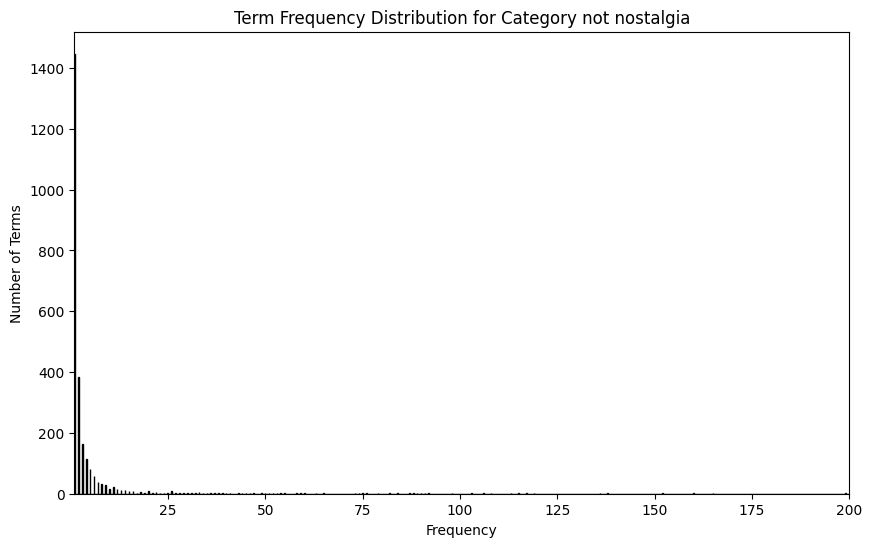

In [127]:
 # Sum over all documents to get total frequency for each word
category_number=0 #You can change it from 0 to 3
word_counts = term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [130]:
category_number=1 #You can change it from 0 to 1
word_counts = term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [count_vect.get_feature_names_out()[i] for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: nostalgia
Number of terms in top 5%: 114
Filtered terms: ['nicer', 'dc', 'if', 'ignore', 'ill', 'david', 'illicit', 'im', 'idea', 'images', 'imho', 'imitated', 'immediately', 'impeccable', 'impersonate', 'dark', 'impossible', 'imagine', 'deal', 'dean', 'iconized', 'hum', 'human', 'degrade', 'humming', 'defining', 'hums', 'hurry', 'dedicated', 'declined', 'decide', 'decent', 'decency', 'december', 'husbands', 'decca', 'ibm', 'death', 'danube', 'democrat', 'imprinted', 'danial', 'crying', 'cry', 'insane', 'cruise', 'cruel', 'crown', 'crossroads', 'crystal', 'crossed', 'inspire', 'crescendo', 'instantly', 'instead', 'instinctively', 'instructions', 'created', 'crop', 'cuban', 'innocent', 'cupcakes', 'incase', 'incredibly', 'dancers', 'incurable', 'india', 'damn', 'dairy', 'dads', 'daddy', 'industry', 'influential', 'infomercial', 'curtis', 'inhaling', 'curled', 'curious', 'innocence', 'in', 'hug', 'https', 'depending', 'divine', 'disturbing', 'distraction', 'hit', 'hitler', 'dis

In [131]:
category_number=0 #You can change it from 0 to 1
word_counts = term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [count_vect.get_feature_names_out()[i] for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: not nostalgia
Number of terms in bottom 1%: 26
Filtered terms: ['00', 'graphics', 'granted', 'grannys', 'grandsons', 'grandma', 'grandfathers', 'grandchildren', 'grandchild', 'gramaphone', 'graffiti', 'grade', 'great', 'grace', 'got', 'goosebumps', 'goodnight', 'goodness', 'gone', 'gold', 'going', 'goes', 'glitter', 'glimpses', 'glass', 'grabbed']


In [133]:
!pip install -U pami

In [134]:
import PAMI


Help on package PAMI:

NAME
    PAMI - PAMI

DESCRIPTION
    A PAttern MIning python library.

PACKAGE CONTENTS
    AssociationRules (package)
    correlatedPattern (package)
    coveragePattern (package)
    extras (package)
    faultTolerantFrequentPattern (package)
    frequentPattern (package)
    fuzzyCorrelatedPattern (package)
    fuzzyFrequentPattern (package)
    fuzzyGeoreferencedFrequentPattern (package)
    fuzzyGeoreferencedPeriodicFrequentPattern (package)
    fuzzyPartialPeriodicPatterns (package)
    fuzzyPeriodicFrequentPattern (package)
    geoReferencedPeriodicFrequentPattern (package)
    georeferencedFrequentPattern (package)
    georeferencedFrequentSequencePattern (package)
    georeferencedPartialPeriodicPattern (package)
    graphTransactionalCoveragePattern (package)
    highUtilityFrequentPattern (package)
    highUtilityGeoreferencedFrequentPattern (package)
    highUtilityPattern (package)
    highUtilityPatternsInStreams (package)
    highUtilitySpatialPat

In [135]:
from PAMI.extras.convert.DF2DB import DF2DB
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
 
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[category])
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)

Database size (total no of transactions) : 750
Number of items : 2295
Minimum Transaction Size : 3
Average Transaction Size : 21.644
Maximum Transaction Size : 70
Standard Deviation Transaction Size : 13.110095245013795
Variance in Transaction Sizes : 172.1040694259012
Sparsity : 0.9905690631808279


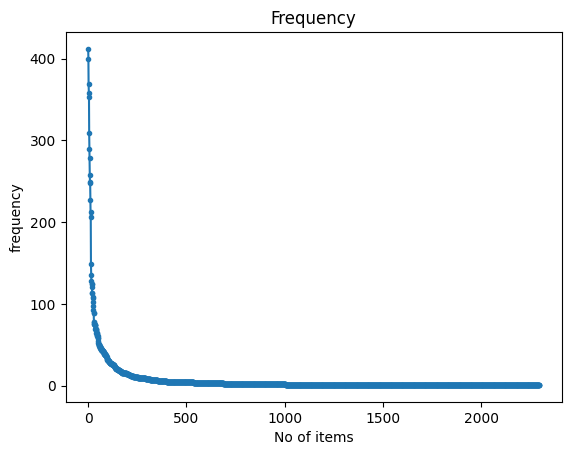

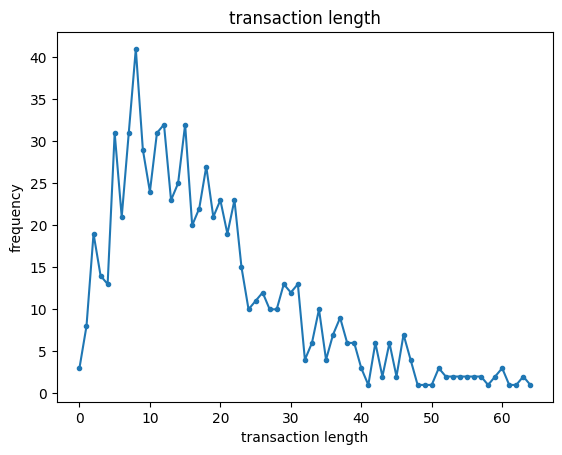

In [137]:
from PAMI.extras.dbStats import TransactionalDatabase as tds

obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [152]:
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime
obj1.save('freq_patterns_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_nostalgia

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 41402
Runtime: 5.644909381866455


,Patterns,Support
0,past,9
1,when:15,9
2,with:11,9
3,it:20,9
4,and:33,9
...,...,...
41397,song and in,1382
41398,song in,4870
41399,and,17334
41400,and in,4648


In [151]:
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_not nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_not_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime
obj1.save('freq_patterns_not_nostalgia_minSup9.txt') #save the patterns


Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 9697
Runtime: 1.398967981338501


In [155]:
#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_nostalgia, frequentPatternsDF_not_nostalgia]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df_ in dfs:
    for pattern in df_['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df_) for df_ in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df_ in dfs:
    filtered_df = df_[df_['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)


# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

                   Patterns  Support
40037               song in     4870
40038                and in     4648
40033                 to in     4615
40031               to song     4398
40020                to was     3964
...                     ...      ...
42776      she song this my        9
42775         she song this        9
28859  this:10 in my it and        9
28860  this:10 in my it was        9
0                      past        9

[48373 rows x 2 columns]
Number of patterns discarded: 2726


# 3. Advance part

In [161]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(df['comment'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
df['tokenized_comment'] = df['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=df.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = df['tokenized_comment'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=df.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,045,07,10,100,10m,11,11th,12,...,this:10 when in to was song,reminds my:9 of me,the she in of and,she in of and,she song my and,she song this my,she song this,this:10 in my it and,this:10 in my it was,past
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [162]:
!pip install umap
!pip install umap-learn


  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3543 sha256=3ab4a547e157ec559a07f32d8d77596a057e6a38c09535f2c721ef93172d125e
  Stored in directory: /root/.cache/pip/wheels/15/f1/28/53dcf7a309118ed35d810a5f9cb995217800f3f269ab5771cb
Successfully built umap
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 1.9 MB/s eta 0:00:00


In [163]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

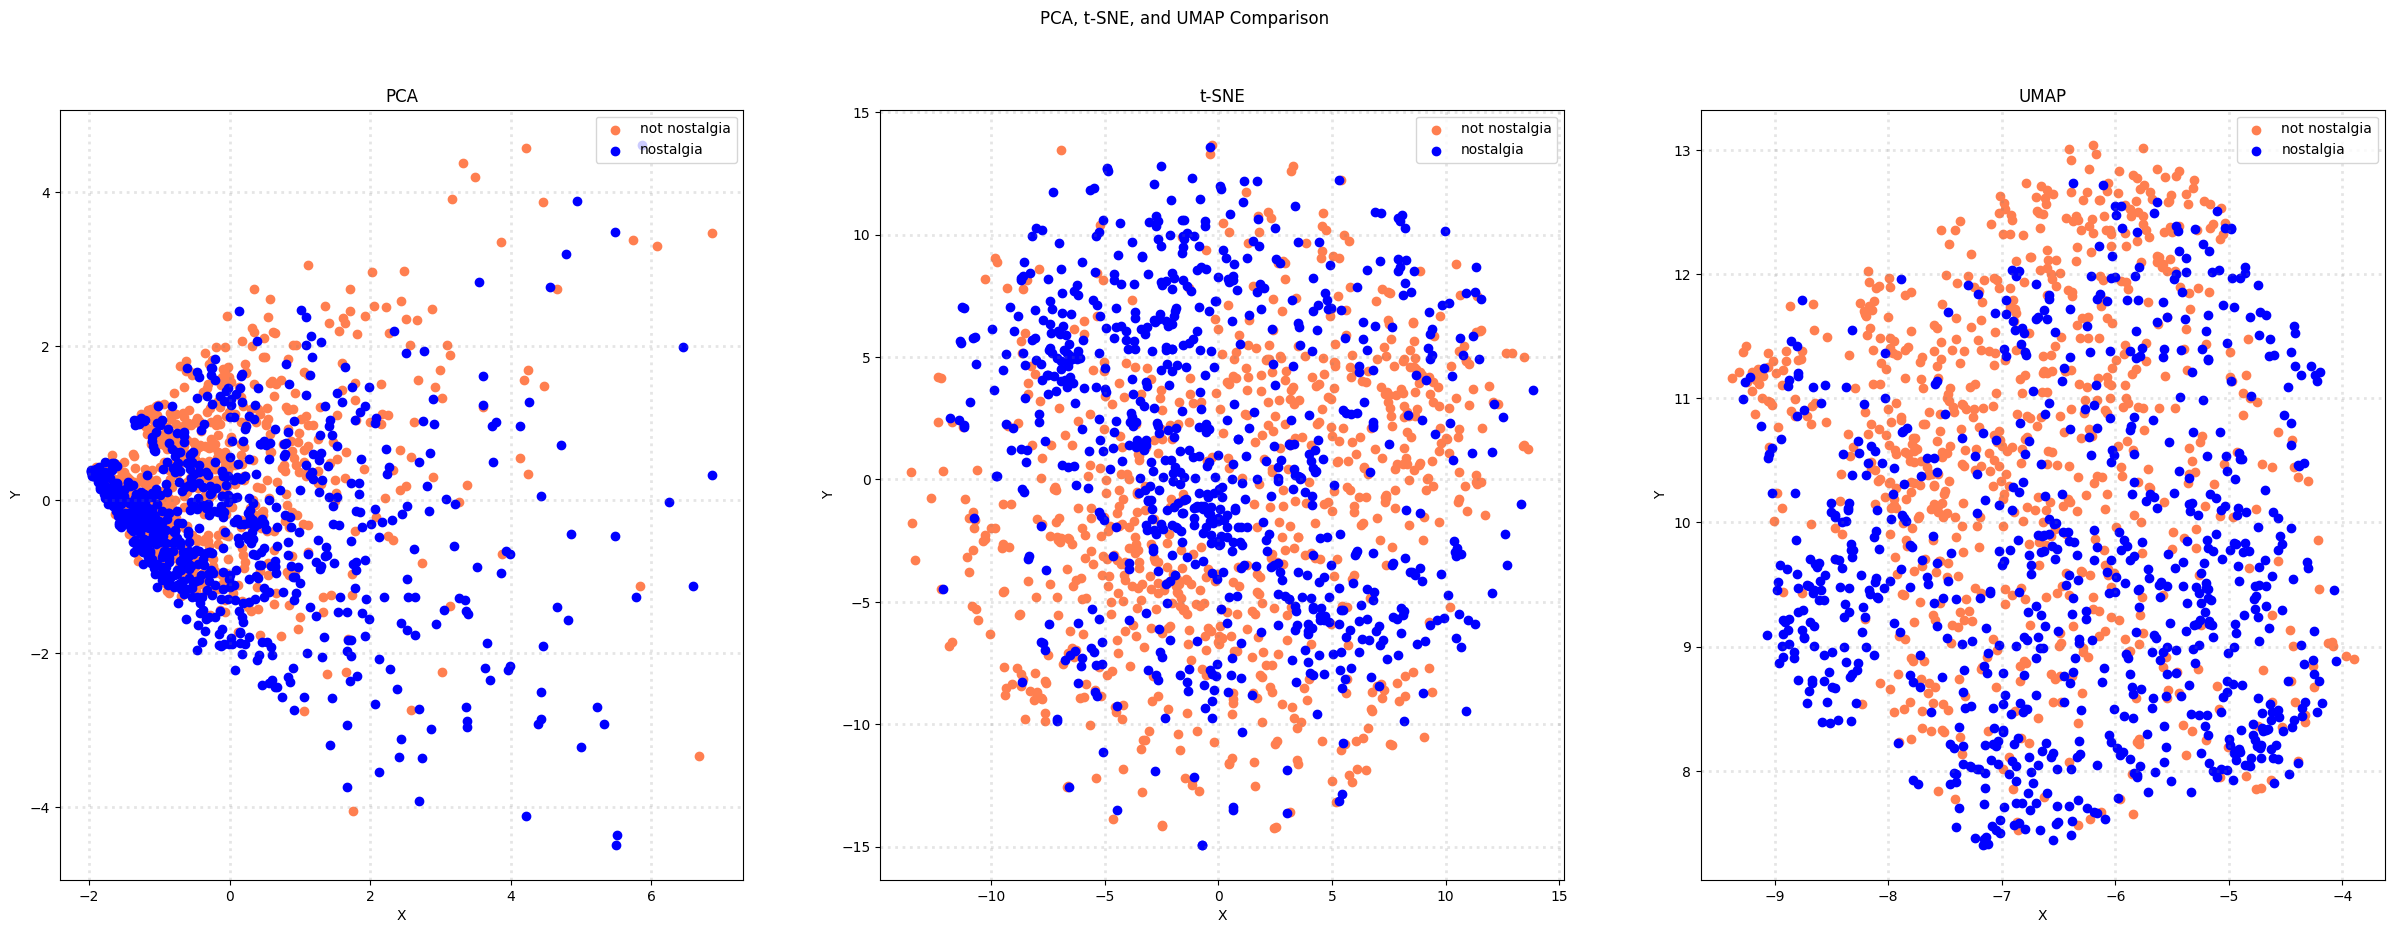

In [166]:
# Plot the results in subplots
col = ['blue', 'orange']
categories = df['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[df['sentiment'] == category].T[0]
        ys = X_reduced[df['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [167]:
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)


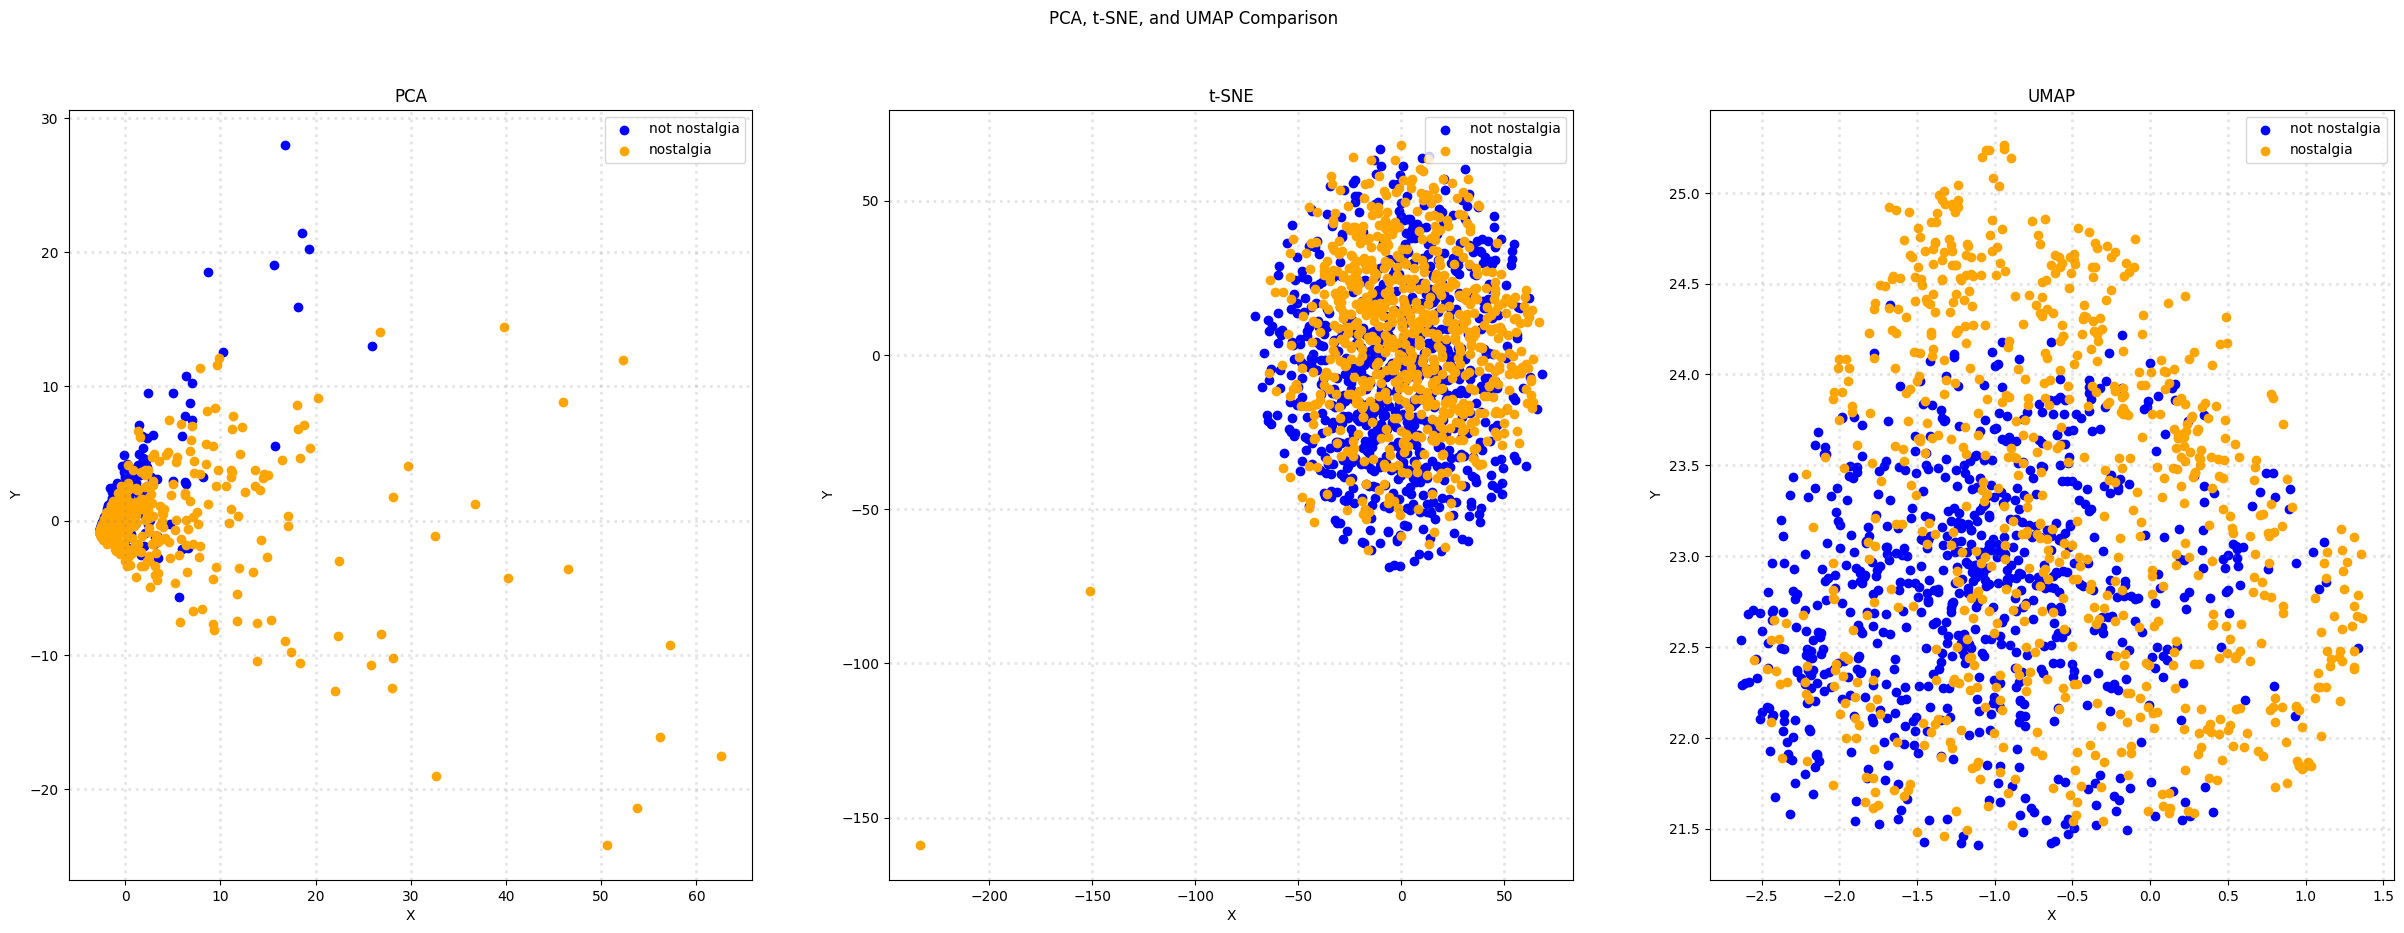

In [185]:
# Plot the results in subplots
col = [ 'blue', 'orange']
categories = df['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[df['sentiment'] == category].T[0]
        ys = X_reduced[df['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

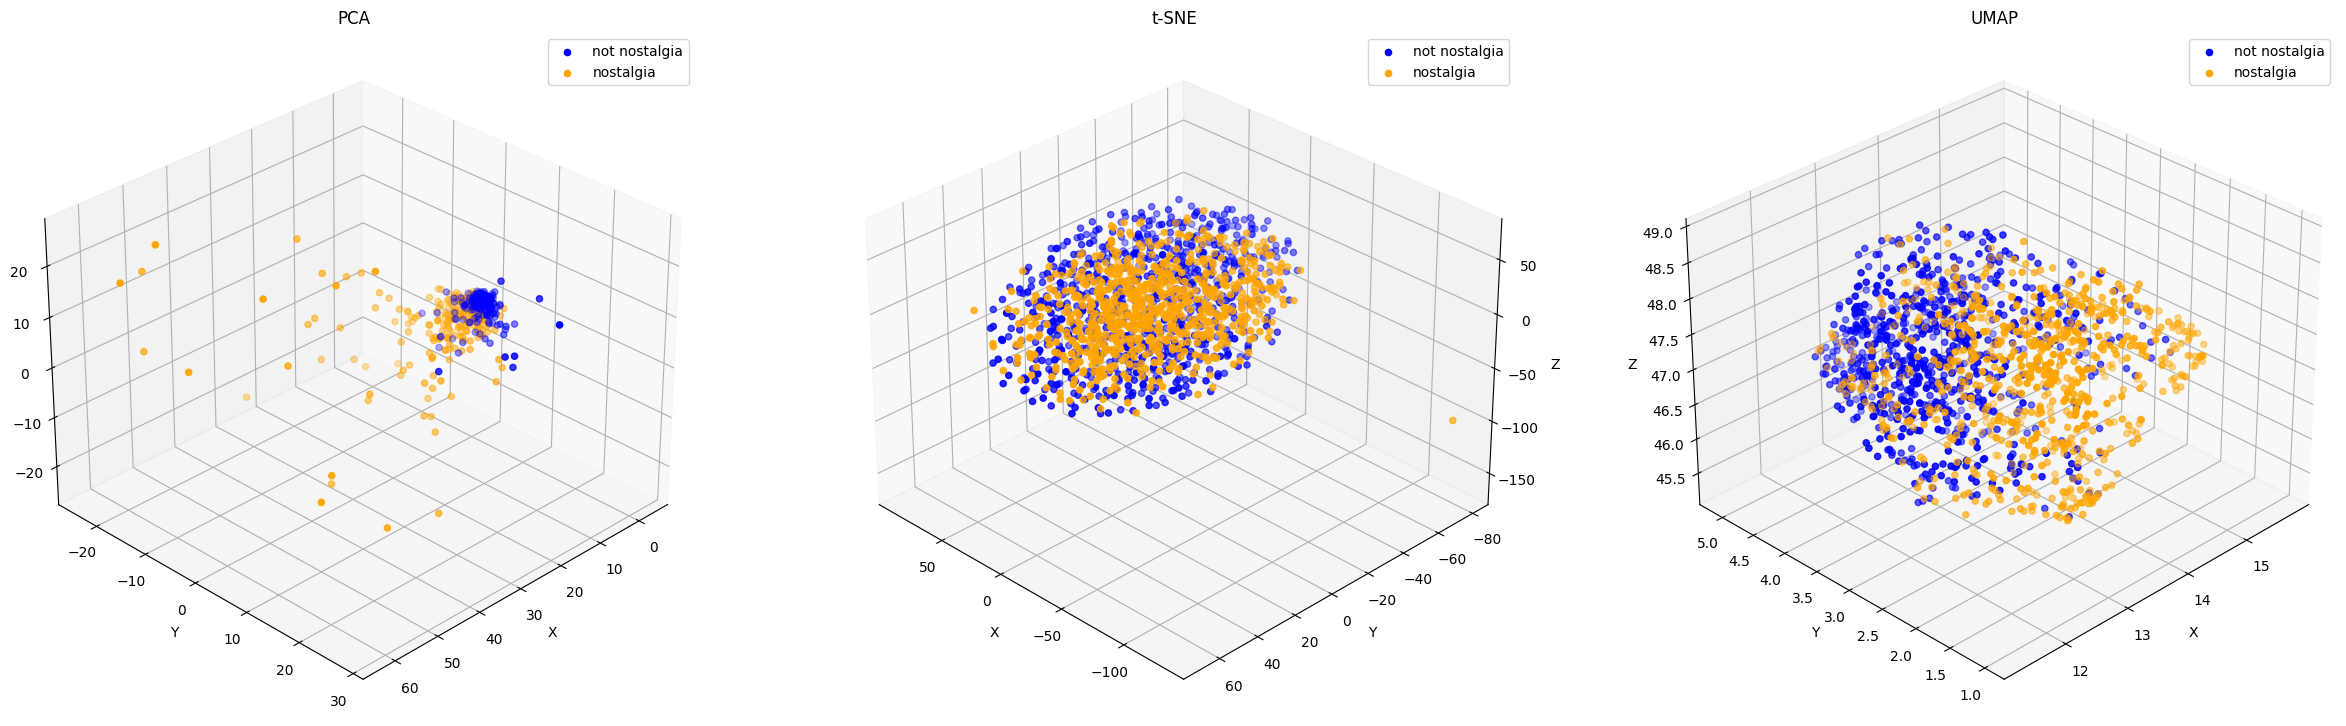

In [186]:
from mpl_toolkits.mplot3d import Axes3D

# Answer here
# Applying dimensionality reduction with PCA, t-SNE, and UMAP
X_pca_aug = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

col = ['blue', 'orange']
categories = df['sentiment'].unique() 

# Create 3D subplots
fig = plt.figure(figsize=(30, 10))

# Function to create a 3D scatter plot
def plot_3d_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[df['sentiment'] == category][:, 0]
        ys = X_reduced[df['sentiment'] == category][:, 1]
        zs = X_reduced[df['sentiment'] == category][:, 2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')

# Create 3D scatter plots for PCA, t-SNE, and UMAP
ax1 = fig.add_subplot(131, projection='3d')
plot_3d_scatter(ax1, X_pca_aug, 'PCA')

ax2 = fig.add_subplot(132, projection='3d')
plot_3d_scatter(ax2, X_tsne_aug, 't-SNE')

ax3 = fig.add_subplot(133, projection='3d')
plot_3d_scatter(ax3, X_umap_aug, 'UMAP')

# Adjust view angles
ax1.view_init(elev=30, azim=45)
ax2.view_init(elev=30, azim=135)
ax3.view_init(elev=30, azim=225)

plt.show()

In [176]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(df.nostalgia)
df['bin_category'] = mlb.transform(df['nostalgia']).tolist()
df[0:9]
mlb.fit(df.sentiment)
df['bin_category'] = mlb.transform(df['sentiment']).tolist()
df[0:9]



,sentiment,comment,nostalgia,tokenized_comment,bin_category
0,not nostalgia,He was a singer with a golden voice that I lov...,0,"{16years, many, Jim, of, that, still, Thank, y...",[1]
1,nostalgia,The mist beautiful voice ever I listened to hi...,1,"{of, still, Never, mist, when, love, angel, an...",[0]
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,1,"{but, grow, pretensions, of, Always, so, most,...",[0]
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,0,"{later, granted, of, served, man, that, back, ...",[1]
4,nostalgia,listening to his songs reminds me of my mum wh...,1,"{everyday, reminds, mum, of, my, to, his, who,...",[0]
5,nostalgia,"Every time I heard this song as a child, I use...",1,"{many, Jim, of, that, still, over, your, RIP, ...",[0]
6,nostalgia,"My dad loved listening to Jim Reeves, when I w...",1,"{but, Jim, back, when, things., the, Reeves,, ...",[0]
7,nostalgia,i HAVE ALSO LISTENED TO Jim Reeves since child...,1,"{Jim, LISTENED, comes, am, since, love, ., the...",[0]
8,not nostalgia,Wherever you are you always in my heart,0,"{always, in, my, Wherever, you, are, heart}",[1]


In [177]:
document_to_transform_1 = []
random_record_1 = df.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

In [178]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)


['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
['I love this song reminds me of the love of my life']
['TURN MY MEMORIES BACK IN 1993, TO LAURA FROM COMO, ITALIA, THANK YOU, THANK YOU, THANK YOU']


In [179]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [180]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.190347
Cosine Similarity using count bw 1 and 3: 0.027379
Cosine Similarity using count bw 2 and 3: 0.047946
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


/tmp/ipykernel_29/452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/tmp/ipykernel_29/452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/tmp/ipykernel_29/452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/tmp/ipykernel_29/452772485.py:17: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this opera

In [200]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(df[['sentiment','nostalgia']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, df['nostalgia'], test_size=0.3, random_state=42)

In [184]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
#print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

Accuracy: 0.8822222222222222

Classification Report:
               precision    recall  f1-score   support

           0     0.9463    0.8220    0.8798       236
           1     0.8286    0.9486    0.8845       214

    accuracy                         0.8822       450
   macro avg     0.8875    0.8853    0.8822       450
weighted avg     0.8903    0.8822    0.8821       450



In [190]:
#Third part
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = TfidfVectorizer()
X_Tfidf = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()
test = pd.DataFrame(X_Tfidf.toarray(),columns = vectorizer.get_feature_names_out())


In [191]:
# Assuming 'X' is your DataFrame
comment_list = df['comment'][:].tolist()
vectorizer = TfidfVectorizer()
X_Tfidf = vectorizer.fit_transform(comment_list)
vectorizer.get_feature_names_out()

array(['00', '000', '045', ..., 'yup', 'zealand', 'zulus'], dtype=object)

note: I try Gaussian Naive Bayes but report error. I check the method down online. 

[TFIDF](https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

[Naive Bayes Classifier](https://scikit-learn.org/1.5/modules/naive_bayes.html)

In [204]:
X_train, X_test, y_train, y_test = train_test_split(df['comment'], df['nostalgia'], test_size=0.1, random_state=60)

#Naive Bayes Classifier & TF-IDF#
# Initialize 
tfidf = TfidfVectorizer()
nb_tfidf = BernoulliNB()

# Transform to TF-IDF features
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train the model
nb_tfidf.fit(X_train_tfidf, y_train)

# predictions
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)


print(classification_report(y_test, y_pred_tfidf))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92        74
           1       0.90      0.95      0.92        76

    accuracy                           0.92       150
   macro avg       0.92      0.92      0.92       150
weighted avg       0.92      0.92      0.92       150

